In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.spatial import distance
from sklearn.datasets import load_iris

In [17]:
iris=load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
from sklearn.cluster import KMeans

In [21]:
def find_bic(kmeans,X):
    
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    m = kmeans.n_clusters
    n = np.bincount(labels)
    N, d = X.shape

    cl_var=(1.0/(N - m)/d)*sum([sum(distance.cdist(X[np.where(labels==i)],[centers[0][i]],'euclidean')**2) for i in range(m)])
    const_term=0.5*m*np.log(N)*(d+1)
    BIC=np.sum([n[i]*np.log(n[i])-n[i]*np.log(N)-((n[i]*d)/2)*np.log(2*np.pi*cl_var)-((n[i]-1)*d/2) for i in range(m)])-const_term

    return(BIC)

In [31]:
BIC=[]
for i in range(2,int(math.sqrt(len(iris.data)))):
    kms=KMeans(n_clusters=i)
    label=kms.fit_predict(iris.data)
    BIC.append(find_bic(kms,iris.data)/silhouette_score(iris.data,label))
    
print(BIC)

[-826.1367693646696, -799.6794727282744, -804.8347143453199, -763.4331091276454, -1003.5610920744257, -1039.8638529301404, -1106.5386987046672, -1065.2451871223523, -1214.1943242425752, -1215.300151255735]


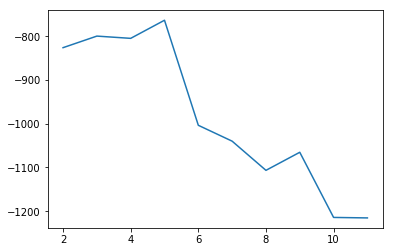

In [32]:
plt.plot(range(2,int(math.sqrt(len(iris.data)))),BIC)

In [33]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples